# Data Augmentations

## Target
- Add data augmentations to improve overall testing accuracy.
- Based on analysis of wrong predictions in the last step, random rotations,
- Random affine transormations and Color jitter augmentations have been added.

## Results
- `Total parameters:` 7,624
- Best Training Accuracy: 97.81% at 14th Epoch
- Best Testing Accuracy: 99.27% at 15th Epoch

## Analysis
- Underfitting is clearly evident, training accuracy is consistently lower than testing accuracy.


## Import Libraries

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

BASE_DIR='/content/drive/My Drive/S7'
%cd $BASE_DIR

Mounted at /content/drive
/content/drive/My Drive/S7


In [ ]:
from model_5 import Net, model_summary, model_train, model_test, draw_graphs

## Data Transformation

In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.RandomAffine(degrees=7, shear=10, translate=(0.1, 0.1), scale=(0.8, 1.2)),
                                       transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.40, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

## data Loaders

In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Model Summary

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
model_summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

## Train and Test

In [ ]:
from torch.optim.lr_scheduler import StepLR, ExponentialLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)

EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    model_train(model, device, train_loader, optimizer, epoch)
    model_test(model, device, test_loader)

EPOCH: 1


Loss=0.2269095927476883 Batch_id=468 Accuracy=79.17: 100%|██████████| 469/469 [00:42<00:00, 11.12it/s]



Test set: Average loss: 0.1118, Accuracy: 9666/10000 (96.66%)

EPOCH: 2


Loss=0.21606667339801788 Batch_id=468 Accuracy=94.39: 100%|██████████| 469/469 [00:42<00:00, 11.14it/s]



Test set: Average loss: 0.0588, Accuracy: 9826/10000 (98.26%)

EPOCH: 3


Loss=0.18090349435806274 Batch_id=468 Accuracy=95.64: 100%|██████████| 469/469 [00:41<00:00, 11.31it/s]



Test set: Average loss: 0.0465, Accuracy: 9865/10000 (98.65%)

EPOCH: 4


Loss=0.10534816980361938 Batch_id=468 Accuracy=96.51: 100%|██████████| 469/469 [00:41<00:00, 11.28it/s]



Test set: Average loss: 0.0358, Accuracy: 9890/10000 (98.90%)

EPOCH: 5


Loss=0.13102559745311737 Batch_id=468 Accuracy=96.67: 100%|██████████| 469/469 [00:41<00:00, 11.23it/s]



Test set: Average loss: 0.0350, Accuracy: 9887/10000 (98.87%)

EPOCH: 6


Loss=0.10400339961051941 Batch_id=468 Accuracy=96.96: 100%|██████████| 469/469 [00:41<00:00, 11.42it/s]



Test set: Average loss: 0.0329, Accuracy: 9900/10000 (99.00%)

EPOCH: 7


Loss=0.07052617520093918 Batch_id=468 Accuracy=97.14: 100%|██████████| 469/469 [00:43<00:00, 10.75it/s]



Test set: Average loss: 0.0329, Accuracy: 9899/10000 (98.99%)

EPOCH: 8


Loss=0.03531525284051895 Batch_id=468 Accuracy=97.28: 100%|██████████| 469/469 [00:43<00:00, 10.71it/s]



Test set: Average loss: 0.0343, Accuracy: 9889/10000 (98.89%)

EPOCH: 9


Loss=0.01984354667365551 Batch_id=468 Accuracy=97.39: 100%|██████████| 469/469 [00:43<00:00, 10.84it/s]



Test set: Average loss: 0.0314, Accuracy: 9899/10000 (98.99%)

EPOCH: 10


Loss=0.1295839548110962 Batch_id=468 Accuracy=97.44: 100%|██████████| 469/469 [00:42<00:00, 10.96it/s]



Test set: Average loss: 0.0245, Accuracy: 9921/10000 (99.21%)

EPOCH: 11


Loss=0.18886397778987885 Batch_id=468 Accuracy=97.61: 100%|██████████| 469/469 [00:44<00:00, 10.47it/s]



Test set: Average loss: 0.0247, Accuracy: 9917/10000 (99.17%)

EPOCH: 12


Loss=0.02825935184955597 Batch_id=468 Accuracy=97.79: 100%|██████████| 469/469 [00:42<00:00, 10.92it/s]



Test set: Average loss: 0.0250, Accuracy: 9914/10000 (99.14%)

EPOCH: 13


Loss=0.1248445212841034 Batch_id=468 Accuracy=97.62: 100%|██████████| 469/469 [00:41<00:00, 11.34it/s]



Test set: Average loss: 0.0278, Accuracy: 9919/10000 (99.19%)

EPOCH: 14


Loss=0.05823563411831856 Batch_id=468 Accuracy=97.81: 100%|██████████| 469/469 [00:43<00:00, 10.84it/s]



Test set: Average loss: 0.0237, Accuracy: 9924/10000 (99.24%)

EPOCH: 15


Loss=0.06488386541604996 Batch_id=468 Accuracy=97.78: 100%|██████████| 469/469 [00:43<00:00, 10.79it/s]



Test set: Average loss: 0.0242, Accuracy: 9927/10000 (99.27%)



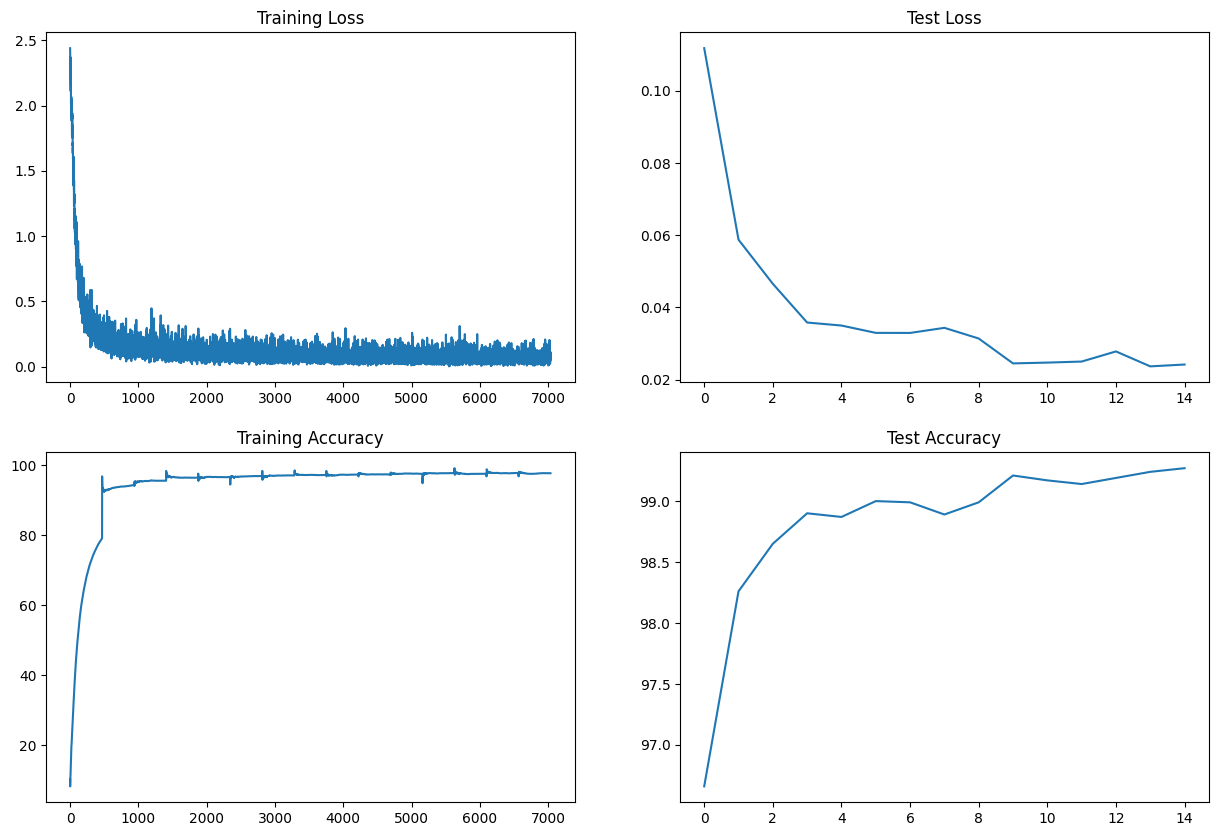

In [ ]:
draw_graphs()